# DS 675 Milestone 4: Rain in Australia

Team Members: Brian Phung Tran, Mickayla Sujkowski, Ze Hong (Jason) Wu

Link to video report: LINK REMOVED (not meant for public-facing viewing)

## Objectives

The "Rain in Australia" data set contains around 140,000 entries of daily records of meteorological data at different places in Australia, from 2007 to 2017, collected by the Australian Meteorological Bureau. There are a total of 23 columns included of types numerical, categorical, and boolean. Additional information can be found in the dataset's Kaggle page, linked here: https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package/data

The goal of our project is to develop supervised training models that can be used to predict for two different features in the Rain in Australia data set: "RainToday", a categorical feature which describes whether there was rain for a given day and location in Australia, and "Rainfall", a numerical feature which describes the amount of rainfall in centimeters for the given day and location.

## Distribution of Work

Jason created the initial version of this report-notebook and ran the code cells shown below. Brian independently verified this work, tested a different deep learning model made with TensorFlow against the Rainfall values, and completed the results and conclusion section. Mickayla added the data exploratory analysis visualization, reviewed and edited the report, and prepared the outline and presentation for the video presentation.

## Initial Steps: Adding Data

This is a Kaggle notebook, which allows us to add Kaggle datasets to the notebook using the File->Add Input option on Kaggle's editor. If you (the reader) are trying to replicate this on Google Colab, you might want to download the Rain in Australia dataset to your Google Drive before linking Drive to your notebook. If you are trying to replicate this on your local device, you might want to download and unzip the dataset to your local directory.

In [ ]:
# If needed for establishing connection to Google Drive
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
! ls /kaggle/input/

In [ ]:
# This is the default Kaggle opening notebook cell.

# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# other imports for model training, testing.
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from scipy import stats # for removing outliers
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Exploratory Inspection

We begin by looking at the data set. Some observations will be discussed below.

Adjust the read_csv directory to wherever you placed the .csv file, if necessary.

In [ ]:
file_location = "/kaggle/input/weather-dataset-rattle-package/weatherAUS.csv" # Adjust as needed
df = pd.read_csv('/content/drive/MyDrive/DS_675/weatherAUS.csv')
df = df.replace(np.nan, None) # for ease of work later on
df.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,12/1/2008,Albury,13.4,22.9,0.6,None,None,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,None,16.9,21.8,No,No
1,12/2/2008,Albury,7.4,25.1,0.0,None,None,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,None,None,17.2,24.3,No,No
2,12/3/2008,Albury,12.9,25.7,0.0,None,None,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,None,2.0,21.0,23.2,No,No
3,12/4/2008,Albury,9.2,28.0,0.0,None,None,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,None,None,18.1,26.5,No,No
4,12/5/2008,Albury,17.5,32.3,1.0,None,None,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
5,12/6/2008,Albury,14.6,29.7,0.2,None,None,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,None,None,20.6,28.9,No,No
6,12/7/2008,Albury,14.3,25.0,0.0,None,None,W,50.0,SW,...,49.0,19.0,1009.6,1008.2,1.0,None,18.1,24.6,No,No
7,12/8/2008,Albury,7.7,26.7,0.0,None,None,W,35.0,SSE,...,48.0,19.0,1013.4,1010.1,None,None,16.3,25.5,No,No
8,12/9/2008,Albury,9.7,31.9,0.0,None,None,NNW,80.0,SE,...,42.0,9.0,1008.9,1003.6,None,None,18.3,30.2,No,Yes
9,12/10/2008,Albury,13.1,30.1,1.4,None,None,W,28.0,S,...,58.0,27.0,1007.0,1005.7,None,None,20.1,28.2,Yes,No


In [ ]:
df["RainToday"].value_counts()

,count
RainToday,
No,110319
Yes,31880


In [ ]:
len(df), len(df.dropna())

(145460, 56420)

In [ ]:
df.dtypes

,0
Date,object
Location,object
MinTemp,object
MaxTemp,object
Rainfall,object
Evaporation,object
Sunshine,object
WindGustDir,object
WindGustSpeed,object
WindDir9am,object


In [ ]:
categorical = [col for col in df.columns if df[col].dtypes == 'O']
categorical

['Date',
 'Location',
 'MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustDir',
 'WindGustSpeed',
 'WindDir9am',
 'WindDir3pm',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'RainToday',
 'RainTomorrow']

The raw data requires some work; some features that are clearly numericals are not registered as such.

In [ ]:
non_numericals = ["Date", "Location", "WindGustDir", "WindDir9am", "WindDir3pm", "RainToday", "RainTomorrow"]

#df = df.replace(np.nan, None) # for ease of work later on
for col in df.columns:
    if col not in non_numericals:
        if df[col].dtype != np.float16:
            df[col] = df[col].astype(np.float16)

# We cannot convert RainToday and RainTomorrow directly to boolean
# because "Yes", "No" does not clearnly become True, False
# hence the use of a dictionary and apply()
replacement_dict = {
    "Yes": True,
    "No": False,
    True: True, # to make rerunning this cell not throw errors
    False: False,
    None: False,
}
for col in ["RainToday", "RainTomorrow"]:
    df[col] = df[col].apply(lambda input: replacement_dict[input])
    df[col] = df[col].astype(bool) # Convert bool to integer 0/1; not doing so causes NaN values to appear in the train-test-s-lot partitions
    #df[col] = df[col].astype(np.int8)
df.dtypes

,0
Date,object
Location,object
MinTemp,float16
MaxTemp,float16
Rainfall,float16
Evaporation,float16
Sunshine,float16
WindGustDir,object
WindGustSpeed,float16
WindDir9am,object


In [ ]:
df["RainToday"].value_counts()

,count
RainToday,
False,113580
True,31880


This looks a lot better! The features that should be numbers are now numbers so we can move on.

In [ ]:
df["Date"] = pd.to_datetime(df["Date"])
df = df.assign( # Replace the date with day, month, year.
    Year=df["Date"].dt.year,
    Month=df["Date"].dt.month,
    Day=df["Date"].dt.day,
)
df.drop('Date', axis=1, inplace=True)
#df_dropped2[['Day', 'Month', 'Year']] = pd.DataFrame(df_dropped2['Date'].dt.day, df_dropped2['Date'].dt.month, df_dropped2['Date'].dt.year)
df.head(10)
#df_dropped2['Date'].dt.day

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,Albury,13.398438,22.906250,0.600098,NaN,NaN,W,44.0,W,WNW,...,1007.0,8.0,NaN,16.906250,21.796875,False,False,2008,12,1
1,Albury,7.398438,25.093750,0.000000,NaN,NaN,WNW,44.0,NNW,WSW,...,1008.0,NaN,NaN,17.203125,24.296875,False,False,2008,12,2
2,Albury,12.898438,25.703125,0.000000,NaN,NaN,WSW,46.0,W,WSW,...,1008.5,NaN,2.0,21.000000,23.203125,False,False,2008,12,3
3,Albury,9.203125,28.000000,0.000000,NaN,NaN,NE,24.0,SE,E,...,1013.0,NaN,NaN,18.093750,26.500000,False,False,2008,12,4
4,Albury,17.500000,32.312500,1.000000,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.796875,29.703125,False,False,2008,12,5
5,Albury,14.601562,29.703125,0.199951,NaN,NaN,WNW,56.0,W,W,...,1005.5,NaN,NaN,20.593750,28.906250,False,False,2008,12,6
6,Albury,14.296875,25.000000,0.000000,NaN,NaN,W,50.0,SW,W,...,1008.0,1.0,NaN,18.093750,24.593750,False,False,2008,12,7
7,Albury,7.699219,26.703125,0.000000,NaN,NaN,W,35.0,SSE,W,...,1010.0,NaN,NaN,16.296875,25.500000,False,False,2008,12,8
8,Albury,9.703125,31.906250,0.000000,NaN,NaN,NNW,80.0,SE,NW,...,1003.5,NaN,NaN,18.296875,30.203125,False,True,2008,12,9
9,Albury,13.101562,30.093750,1.400391,NaN,NaN,W,28.0,S,SSE,...,1005.5,NaN,NaN,20.093750,28.203125,True,False,2008,12,10


##Data Visualization
Here we added a section to visualize the data so we can understand what we are looking at. We created a column chart of 3 windgust columns to determine if they were important. They were not ideal for modeling.

NameError: name 'df' is not defined

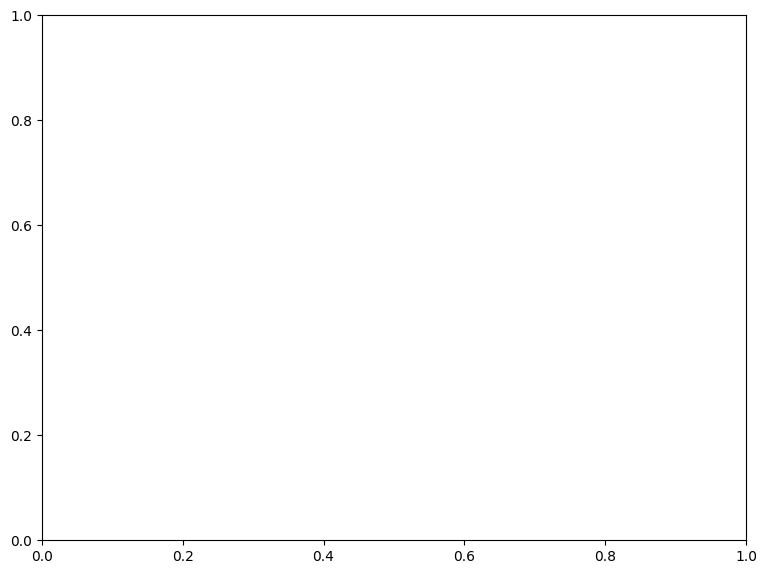

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

categorical_columns = ['WindGustDir', 'WindDir9am', 'WindDir3pm']
plt.figure(figsize=(20, 15))

for i, column in enumerate(categorical_columns, 1):
    plt.subplot(2, 2, i) #specify subplot grid
    sns.countplot(data=df, x=column, order=df[column].value_counts().index)
    plt.title(column)
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=50, ha='right') #adjust x-axis labels for readability

plt.tight_layout()

## Missing Data

Almost every attribute (besides location and date) have some amount of missing values. Some, like MinTemp or MaxTemp, only have a small proportion of missing values (around 1% of all entries). Others, such as Evaporation and Sunshine, have many missing values (upwards of 48%).

## Initial Approach: drop some, inpute some

Jason planned  on keeping attributes with no more than around 10% missing entries and discard the ones with higher missing entries (Evaporation, Sunshine, Cloud9am, Cloud3pm) in Milestone 3. This was a good plan so we decided to follow-through. We do not plan on imputing values for these removed features because, with this many missing entries, there is the possibility that the data we have does not reflect the actual data.

We will also drop Location, since we don't think those will be particularly helpful for classification work. We will convert Date into model-friendly day, month, year features later, as well as one-hot encode some of the categoricals, later.

In [ ]:
drop_cols = ["Location", "Cloud9am", "Cloud3pm", "Evaporation", "Sunshine"]
df_dropped = df.copy()
df_dropped.drop(columns=drop_cols, inplace=True)
df_dropped.head(10)

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,13.398438,22.906250,0.600098,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.5,1007.0,16.906250,21.796875,False,False,2008,12,1
1,7.398438,25.093750,0.000000,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.5,1008.0,17.203125,24.296875,False,False,2008,12,2
2,12.898438,25.703125,0.000000,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.5,1008.5,21.000000,23.203125,False,False,2008,12,3
3,9.203125,28.000000,0.000000,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.5,1013.0,18.093750,26.500000,False,False,2008,12,4
4,17.500000,32.312500,1.000000,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1011.0,1006.0,17.796875,29.703125,False,False,2008,12,5
5,14.601562,29.703125,0.199951,WNW,56.0,W,W,19.0,24.0,55.0,23.0,1009.0,1005.5,20.593750,28.906250,False,False,2008,12,6
6,14.296875,25.000000,0.000000,W,50.0,SW,W,20.0,24.0,49.0,19.0,1009.5,1008.0,18.093750,24.593750,False,False,2008,12,7
7,7.699219,26.703125,0.000000,W,35.0,SSE,W,6.0,17.0,48.0,19.0,1013.5,1010.0,16.296875,25.500000,False,False,2008,12,8
8,9.703125,31.906250,0.000000,NNW,80.0,SE,NW,7.0,28.0,42.0,9.0,1009.0,1003.5,18.296875,30.203125,False,True,2008,12,9
9,13.101562,30.093750,1.400391,W,28.0,S,SSE,15.0,11.0,58.0,27.0,1007.0,1005.5,20.093750,28.203125,True,False,2008,12,10


We will also be dropping rows that do not contain RainToday or Rainfall, since RainToday is a training target and Rainfall is intricately linked to it. We do not intend to fill in missing RainToday values since that would be basically making up targets, which could have unforeseen consequences on the model's performance.

In [ ]:
len(df_dropped), len(df_dropped.dropna())

(145460, 113679)

The "Date" feature is in a datetime format, which cannot be used for model training. Therefore, we decomposed it into year, month, day features.

In [ ]:
df_dropped2 = df_dropped.copy()
df_dropped2 = df_dropped2[pd.notna(df_dropped["RainToday"])]
df_dropped2.head(10)
#df_dropped2['Date'].dt.day

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,13.398438,22.906250,0.600098,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.5,1007.0,16.906250,21.796875,False,False,2008,12,1
1,7.398438,25.093750,0.000000,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.5,1008.0,17.203125,24.296875,False,False,2008,12,2
2,12.898438,25.703125,0.000000,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.5,1008.5,21.000000,23.203125,False,False,2008,12,3
3,9.203125,28.000000,0.000000,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.5,1013.0,18.093750,26.500000,False,False,2008,12,4
4,17.500000,32.312500,1.000000,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1011.0,1006.0,17.796875,29.703125,False,False,2008,12,5
5,14.601562,29.703125,0.199951,WNW,56.0,W,W,19.0,24.0,55.0,23.0,1009.0,1005.5,20.593750,28.906250,False,False,2008,12,6
6,14.296875,25.000000,0.000000,W,50.0,SW,W,20.0,24.0,49.0,19.0,1009.5,1008.0,18.093750,24.593750,False,False,2008,12,7
7,7.699219,26.703125,0.000000,W,35.0,SSE,W,6.0,17.0,48.0,19.0,1013.5,1010.0,16.296875,25.500000,False,False,2008,12,8
8,9.703125,31.906250,0.000000,NNW,80.0,SE,NW,7.0,28.0,42.0,9.0,1009.0,1003.5,18.296875,30.203125,False,True,2008,12,9
9,13.101562,30.093750,1.400391,W,28.0,S,SSE,15.0,11.0,58.0,27.0,1007.0,1005.5,20.093750,28.203125,True,False,2008,12,10


In [ ]:
pd.unique(df_dropped2["RainToday"]),df_dropped2["RainToday"].value_counts()

(array([False,  True]),
 RainToday
 False    113580
 True      31880
 Name: count, dtype: int64)

In [ ]:
df_dropped2.isna().sum()

,0
MinTemp,1485
MaxTemp,1261
Rainfall,3261
WindGustDir,10326
WindGustSpeed,10263
WindDir9am,10566
WindDir3pm,4228
WindSpeed9am,1767
WindSpeed3pm,3062
Humidity9am,2654


In [ ]:
# Just to test a hunch.

len(df_dropped2), len(df_dropped2.dropna()), len(df_dropped2.dropna())/len(df_dropped2)
# We keep 78.1% of the initial data with this reduced drop. Let's see if 113k rows is enough to train a good model.

(145460, 113679, 0.7815138182318163)

## Remove Missing Values

The main approach we had in mind was to remove all rows with missing values, using only the remainder for training + validation + testing. This will discard roughly 1/5 of the data, leaving 113679 rows to carry out supervised predictions from. Hopefully this will be enough training data to learn on.

In [ ]:
pd.unique(df_dropped2["RainToday"])

array([False,  True])

In [ ]:
df_dropped2.dropna(axis=0, inplace=True, how="any") # Approach: use only entries with no missing values
df_dropped2.dtypes, df_dropped2.isna().sum()

(MinTemp          float16
 MaxTemp          float16
 Rainfall         float16
 WindGustDir       object
 WindGustSpeed    float16
 WindDir9am        object
 WindDir3pm        object
 WindSpeed9am     float16
 WindSpeed3pm     float16
 Humidity9am      float16
 Humidity3pm      float16
 Pressure9am      float16
 Pressure3pm      float16
 Temp9am          float16
 Temp3pm          float16
 RainToday           bool
 RainTomorrow        bool
 Year               int32
 Month              int32
 Day                int32
 dtype: object,
 MinTemp          0
 MaxTemp          0
 Rainfall         0
 WindGustDir      0
 WindGustSpeed    0
 WindDir9am       0
 WindDir3pm       0
 WindSpeed9am     0
 WindSpeed3pm     0
 Humidity9am      0
 Humidity3pm      0
 Pressure9am      0
 Pressure3pm      0
 Temp9am          0
 Temp3pm          0
 RainToday        0
 RainTomorrow     0
 Year             0
 Month            0
 Day              0
 dtype: int64)

In [ ]:
pd.unique(df_dropped2["RainToday"]), df_dropped2["RainToday"].value_counts()

(array([False,  True]),
 RainToday
 False    88066
 True     25613
 Name: count, dtype: int64)

In [ ]:
df_dropped2.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir', 'WindGustSpeed',
       'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm',
       'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'Year', 'Month', 'Day'],
      dtype='object')

In [ ]:
df_dropped2.head(10)

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,13.398438,22.906250,0.600098,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.5,1007.0,16.906250,21.796875,False,False,2008,12,1
1,7.398438,25.093750,0.000000,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.5,1008.0,17.203125,24.296875,False,False,2008,12,2
2,12.898438,25.703125,0.000000,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.5,1008.5,21.000000,23.203125,False,False,2008,12,3
3,9.203125,28.000000,0.000000,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.5,1013.0,18.093750,26.500000,False,False,2008,12,4
4,17.500000,32.312500,1.000000,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1011.0,1006.0,17.796875,29.703125,False,False,2008,12,5
5,14.601562,29.703125,0.199951,WNW,56.0,W,W,19.0,24.0,55.0,23.0,1009.0,1005.5,20.593750,28.906250,False,False,2008,12,6
6,14.296875,25.000000,0.000000,W,50.0,SW,W,20.0,24.0,49.0,19.0,1009.5,1008.0,18.093750,24.593750,False,False,2008,12,7
7,7.699219,26.703125,0.000000,W,35.0,SSE,W,6.0,17.0,48.0,19.0,1013.5,1010.0,16.296875,25.500000,False,False,2008,12,8
8,9.703125,31.906250,0.000000,NNW,80.0,SE,NW,7.0,28.0,42.0,9.0,1009.0,1003.5,18.296875,30.203125,False,True,2008,12,9
9,13.101562,30.093750,1.400391,W,28.0,S,SSE,15.0,11.0,58.0,27.0,1007.0,1005.5,20.093750,28.203125,True,False,2008,12,10


We cannot train models on features with values "Albury", "Adelaide", and the likes. This is not a natural language processing problem so we do not need to use any embedding layers. Instead we will one-hot encode the categorical features.

In [ ]:
df_onehot = df_dropped2
for categorical in ["WindGustDir", "WindDir9am", "WindDir3pm"]:
    df_onehot = pd.concat([df_onehot, pd.get_dummies(df_onehot[categorical], prefix=categorical)], axis=1)
    df_onehot.drop(columns=categorical, inplace=True)
df_onehot.head(10)

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,13.398438,22.906250,0.600098,44.0,20.0,24.0,71.0,22.0,1007.5,1007.0,...,False,False,False,False,False,False,False,False,True,False
1,7.398438,25.093750,0.000000,44.0,4.0,22.0,44.0,25.0,1010.5,1008.0,...,False,False,False,False,False,False,False,False,False,True
2,12.898438,25.703125,0.000000,46.0,19.0,26.0,38.0,30.0,1007.5,1008.5,...,False,False,False,False,False,False,False,False,False,True
3,9.203125,28.000000,0.000000,24.0,11.0,9.0,45.0,16.0,1017.5,1013.0,...,False,False,False,False,False,False,False,False,False,False
4,17.500000,32.312500,1.000000,41.0,7.0,20.0,82.0,33.0,1011.0,1006.0,...,False,True,False,False,False,False,False,False,False,False
5,14.601562,29.703125,0.199951,56.0,19.0,24.0,55.0,23.0,1009.0,1005.5,...,False,False,False,False,False,False,False,True,False,False
6,14.296875,25.000000,0.000000,50.0,20.0,24.0,49.0,19.0,1009.5,1008.0,...,False,False,False,False,False,False,False,True,False,False
7,7.699219,26.703125,0.000000,35.0,6.0,17.0,48.0,19.0,1013.5,1010.0,...,False,False,False,False,False,False,False,True,False,False
8,9.703125,31.906250,0.000000,80.0,7.0,28.0,42.0,9.0,1009.0,1003.5,...,False,True,False,False,False,False,False,False,False,False
9,13.101562,30.093750,1.400391,28.0,15.0,11.0,58.0,27.0,1007.0,1005.5,...,False,False,False,False,True,False,False,False,False,False


## Final preparations

Here we finish up final preparations (standard scaling with scikit-learn).

In [ ]:
for col in df_onehot.columns:
    if df_onehot[col].dtype == bool and col not in ["RainToday", "RainTomorrow"]:
        df_onehot[col] = df_onehot[col].astype(np.int8)
# Convert bool to integer 0/1; not doing so causes NaN values to appear in the train-test-s-lot partitions
df_onehot.head(10)

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,13.398438,22.906250,0.600098,44.0,20.0,24.0,71.0,22.0,1007.5,1007.0,...,0,0,0,0,0,0,0,0,1,0
1,7.398438,25.093750,0.000000,44.0,4.0,22.0,44.0,25.0,1010.5,1008.0,...,0,0,0,0,0,0,0,0,0,1
2,12.898438,25.703125,0.000000,46.0,19.0,26.0,38.0,30.0,1007.5,1008.5,...,0,0,0,0,0,0,0,0,0,1
3,9.203125,28.000000,0.000000,24.0,11.0,9.0,45.0,16.0,1017.5,1013.0,...,0,0,0,0,0,0,0,0,0,0
4,17.500000,32.312500,1.000000,41.0,7.0,20.0,82.0,33.0,1011.0,1006.0,...,0,1,0,0,0,0,0,0,0,0
5,14.601562,29.703125,0.199951,56.0,19.0,24.0,55.0,23.0,1009.0,1005.5,...,0,0,0,0,0,0,0,1,0,0
6,14.296875,25.000000,0.000000,50.0,20.0,24.0,49.0,19.0,1009.5,1008.0,...,0,0,0,0,0,0,0,1,0,0
7,7.699219,26.703125,0.000000,35.0,6.0,17.0,48.0,19.0,1013.5,1010.0,...,0,0,0,0,0,0,0,1,0,0
8,9.703125,31.906250,0.000000,80.0,7.0,28.0,42.0,9.0,1009.0,1003.5,...,0,1,0,0,0,0,0,0,0,0
9,13.101562,30.093750,1.400391,28.0,15.0,11.0,58.0,27.0,1007.0,1005.5,...,0,0,0,0,1,0,0,0,0,0


## Training and testing: LogReg model (and with cross-validation)

Here we train a standard Logistic Regression model and a LogReg with Cross Validation included in it against the training data. Our models did not perform significantly better than those seen in the Existing Work; further discussion on these results are present in later cells.

We dropped each of the three columns for the X data for these reasons:
- RainToday: this is the y-feature and should not be in X for any reason.
- Rainfall: including this would make the learning process trivial, as we unintentionally discovered earlier in this project.
- RainTomorrow: rather irrelevant to the work at hand; we are looking to learn today's rain, not tomorrow's.

In [ ]:
scaler = StandardScaler()

X = df_onehot.drop(columns=["RainToday", "RainTomorrow", "Rainfall"]) # Rainfall is too direct a correlation with RaiNToday
y = df_onehot["RainToday"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [ ]:
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [ ]:
y_pred_test = logreg.predict(X_test)
y_pred_train = logreg.predict(X_train)

from sklearn.metrics import accuracy_score

# Check accuracy against both train and test, see if there is a major difference
print('Model accuracy score (against testing set): {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))
print('Model accuracy score (against training set): {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Model accuracy score (against testing set): 0.8330
Model accuracy score (against training set): 0.8358


In [ ]:
# logreg with built-in 5-fold cross validation. Default penalty is L2.
# Increased max_iter because the default of 100 wasn't enough to converge.
logregcv = LogisticRegressionCV(max_iter=256, cv=5, random_state=42)
logregcv.fit(X_train, y_train)

LogisticRegressionCV(cv=5, max_iter=256, random_state=42)

In [ ]:
y_pred_test = logregcv.predict(X_test)
y_pred_train = logregcv.predict(X_train)

print('Model accuracy score (against testing set): {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))
print('Model accuracy score (against training set): {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Model accuracy score (against testing set): 0.8327
Model accuracy score (against training set): 0.8356


In [ ]:
sum(abs(y_pred_test^y_test)), len(y_test) # visually confirming that the predictions and y_test do add up
# 3791 misses out of 22736 tests; 0.167 of all predictions are misses. Slightly worse off than the Existing Work results.

(3804, 22736)

The LogReg models, with or without cross-validation, achieved around 83% accuracy.

The performance displayed here is slightly worse than what the models from Existing Work 1 demonstrated (which were trained against RainTomorrow). There are many possible reasons why our model did not achieve greater results; I will explore some of these possible reasons below.

## LogReg comparisons: different input data

The data set prepared above is different from the one the Existing Work arrived at. How much will various different data preparation steps affect the model's final performance? We will perform a few tests using "alternate" data sets (with some of the different changes applied).

## Alternate Data: Partial fillna()

The first Alternate data set involves a partial replacement of missing values: We still drop the four columns with 50k-60k missing data, but for all remainder columns we replace missing values with the median value (or, for the wind direction categorical variables, most common entry). This is mostly in line with what the author of the first Existing Work did, minus the four dropped columns.

In [ ]:
# Copied from previous work.

df_dropped3 = df_dropped.copy()
df_dropped3 = df_dropped3[pd.notna(df_dropped["RainToday"])]

In [ ]:
for col in df_dropped3.columns:
    if col not in ["WindDir9am", "WindDir3pm", "RainToday", "RainTomorrow", "WindGustDir"]:
        if df_dropped3[col].dtype == object:
            df_dropped3[col] = df_dropped3[col].astype(np.float64)
df_dropped3.dtypes

,0
MinTemp,float16
MaxTemp,float16
Rainfall,float16
WindGustDir,object
WindGustSpeed,float16
WindDir9am,object
WindDir3pm,object
WindSpeed9am,float16
WindSpeed3pm,float16
Humidity9am,float16


In [ ]:
numerical = [col for col in df_dropped3.columns if df_dropped3[col].dtypes != 'O']
numerical

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Temp9am',
 'Temp3pm',
 'RainToday',
 'RainTomorrow',
 'Year',
 'Month',
 'Day']

In [ ]:
# Point of divergence. Instead of dropping remaining rows with n/a, replace them

# Replace missing numericals with median instead of deleting rows

for col in numerical:
    col_median=df_dropped3[col].median()
    df_dropped3.fillna({col: col_median}, inplace=True) # using this specific syntax to avoid Pandas warning messages

df_dropped3.isna().sum()

,0
MinTemp,0
MaxTemp,0
Rainfall,0
WindGustDir,10326
WindGustSpeed,0
WindDir9am,10566
WindDir3pm,4228
WindSpeed9am,0
WindSpeed3pm,0
Humidity9am,0


In [ ]:
categorical = [col for col in df_dropped3.columns if df_dropped3[col].dtypes == 'O']
categorical # [ WindGustDir, WindDir9am, WindDir3pm ]
for cat in categorical:
    df_dropped3.fillna({cat: df_dropped3[cat].mode()[0]}, inplace=True)
df_dropped3.isna().sum()

,0
MinTemp,0
MaxTemp,0
Rainfall,0
WindGustDir,0
WindGustSpeed,0
WindDir9am,0
WindDir3pm,0
WindSpeed9am,0
WindSpeed3pm,0
Humidity9am,0


In [ ]:
df_onehot2 = df_dropped3
for categorical in ["WindGustDir", "WindDir9am", "WindDir3pm"]:
    df_onehot2 = pd.concat([df_onehot2, pd.get_dummies(df_onehot2[categorical], prefix=categorical)], axis=1)
    df_onehot2.drop(columns=categorical, inplace=True)
df_onehot2.head(10)

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,13.398438,22.906250,0.600098,44.0,20.0,24.0,71.0,22.0,1007.5,1007.0,...,False,False,False,False,False,False,False,False,True,False
1,7.398438,25.093750,0.000000,44.0,4.0,22.0,44.0,25.0,1010.5,1008.0,...,False,False,False,False,False,False,False,False,False,True
2,12.898438,25.703125,0.000000,46.0,19.0,26.0,38.0,30.0,1007.5,1008.5,...,False,False,False,False,False,False,False,False,False,True
3,9.203125,28.000000,0.000000,24.0,11.0,9.0,45.0,16.0,1017.5,1013.0,...,False,False,False,False,False,False,False,False,False,False
4,17.500000,32.312500,1.000000,41.0,7.0,20.0,82.0,33.0,1011.0,1006.0,...,False,True,False,False,False,False,False,False,False,False
5,14.601562,29.703125,0.199951,56.0,19.0,24.0,55.0,23.0,1009.0,1005.5,...,False,False,False,False,False,False,False,True,False,False
6,14.296875,25.000000,0.000000,50.0,20.0,24.0,49.0,19.0,1009.5,1008.0,...,False,False,False,False,False,False,False,True,False,False
7,7.699219,26.703125,0.000000,35.0,6.0,17.0,48.0,19.0,1013.5,1010.0,...,False,False,False,False,False,False,False,True,False,False
8,9.703125,31.906250,0.000000,80.0,7.0,28.0,42.0,9.0,1009.0,1003.5,...,False,True,False,False,False,False,False,False,False,False
9,13.101562,30.093750,1.400391,28.0,15.0,11.0,58.0,27.0,1007.0,1005.5,...,False,False,False,False,True,False,False,False,False,False


In [ ]:
for col in df_onehot2.columns:
    if df_onehot2[col].dtype == bool:
        df_onehot2[col] = df_onehot2[col].astype(np.int8)
# Convert bool to integer 0/1; not doing so causes NaN values to appear in the train-test-s-lot partitions
df_onehot2.head(10)

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,13.398438,22.906250,0.600098,44.0,20.0,24.0,71.0,22.0,1007.5,1007.0,...,0,0,0,0,0,0,0,0,1,0
1,7.398438,25.093750,0.000000,44.0,4.0,22.0,44.0,25.0,1010.5,1008.0,...,0,0,0,0,0,0,0,0,0,1
2,12.898438,25.703125,0.000000,46.0,19.0,26.0,38.0,30.0,1007.5,1008.5,...,0,0,0,0,0,0,0,0,0,1
3,9.203125,28.000000,0.000000,24.0,11.0,9.0,45.0,16.0,1017.5,1013.0,...,0,0,0,0,0,0,0,0,0,0
4,17.500000,32.312500,1.000000,41.0,7.0,20.0,82.0,33.0,1011.0,1006.0,...,0,1,0,0,0,0,0,0,0,0
5,14.601562,29.703125,0.199951,56.0,19.0,24.0,55.0,23.0,1009.0,1005.5,...,0,0,0,0,0,0,0,1,0,0
6,14.296875,25.000000,0.000000,50.0,20.0,24.0,49.0,19.0,1009.5,1008.0,...,0,0,0,0,0,0,0,1,0,0
7,7.699219,26.703125,0.000000,35.0,6.0,17.0,48.0,19.0,1013.5,1010.0,...,0,0,0,0,0,0,0,1,0,0
8,9.703125,31.906250,0.000000,80.0,7.0,28.0,42.0,9.0,1009.0,1003.5,...,0,1,0,0,0,0,0,0,0,0
9,13.101562,30.093750,1.400391,28.0,15.0,11.0,58.0,27.0,1007.0,1005.5,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split

scaler = StandardScaler()

X = df_onehot2.drop(columns=["RainToday", "RainTomorrow", "Rainfall"])
y = df_onehot2["RainToday"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [ ]:
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

y_pred_test = logreg.predict(X_test)
y_pred_train = logreg.predict(X_train)

from sklearn.metrics import accuracy_score

# Check accuracy against both train and test, see if there is a major difference
print('Model accuracy score (against testing set): {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))
print('Model accuracy score (against training set): {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Model accuracy score (against testing set): 0.8334
Model accuracy score (against training set): 0.8309


In [ ]:
# logreg with built-in 5-fold cross validation. Default penalty is L2.
# Increased max_iter because the default of 100 wasn't enough to converge.
logregcv = LogisticRegressionCV(max_iter=256, cv=5, random_state=42)
logregcv.fit(X_train, y_train)

y_pred_test = logregcv.predict(X_test)
y_pred_train = logregcv.predict(X_train)

print('Model accuracy score (against testing set): {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))
print('Model accuracy score (against training set): {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Model accuracy score (against testing set): 0.8335
Model accuracy score (against training set): 0.8309


In [ ]:
# visually confirming that the predictions and y_test do add up
# This is for the base LogReg, not LogRegCV.
sum(abs(y_pred_test - y_test)), len(y_test)
# Comparable to first attempt results.

(4845, 29092)

The partially imputed data achieved comparable performances when used to train logistic regression models with the same hyperparameters. Replacing these numerical values may not be as problematic as I first thought.

## Alternate Data Set: "Original"

The second alternate data set will be largely similar the one used in the first Existing Work. I will keep all columns and fillna() all of them. The only difference is that, while in the Existing Work the dev did a train_test_split first (and used X_train medians and modes to impute for both), I imputed the medians and modes based on the full data set before train_test_split.

In [ ]:
df_full = df.copy()

# fillna() all rowas.

for col in df_full.columns:
    if col not in ["WindDir9am", "WindDir3pm", "RainToday", "RainTomorrow", "WindGustDir", "Location"]:
        if df_full[col].dtype == object:
            df_full[col] = df_full[col].astype(np.float64)

numerical = [col for col in df_full.columns if df_full[col].dtypes != 'O']
for col in numerical:
    col_median=df_full[col].median()
    df_full.fillna({col: col_median}, inplace=True) # using this specific syntax to avoid Pandas warning messages

categorical = [col for col in df_full.columns if df_full[col].dtypes == 'O']
categorical # [ WindGustDir, WindDir9am, WindDir3pm ]
for cat in categorical:
    df_full.fillna({cat: df_full[cat].mode()[0]}, inplace=True)

df_full.isna().sum()

,0
Location,0
MinTemp,0
MaxTemp,0
Rainfall,0
Evaporation,0
Sunshine,0
WindGustDir,0
WindGustSpeed,0
WindDir9am,0
WindDir3pm,0


In [ ]:
df_onehot_full = df_full
for categorical in ["WindDir9am", "WindDir3pm", "WindGustDir", "Location"]:
    df_onehot_full = pd.concat([df_onehot_full, pd.get_dummies(df_onehot_full[categorical], prefix=categorical)], axis=1)
    df_onehot_full.drop(columns=categorical, inplace=True)
for col in df_onehot_full.columns:
    if df_onehot_full[col].dtype == bool:
        df_onehot_full[col] = df_onehot_full[col].astype(np.int8)
# Convert bool to integer 0/1; not doing so causes NaN values to appear in the train-test-s-lot partitions
df_onehot_full.head(10)

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,Location_Townsville,Location_Tuggeranong,Location_Uluru,Location_WaggaWagga,Location_Walpole,Location_Watsonia,Location_Williamtown,Location_Witchcliffe,Location_Wollongong,Location_Woomera
0,13.398438,22.906250,0.600098,4.800781,8.398438,44.0,20.0,24.0,71.0,22.0,...,0,0,0,0,0,0,0,0,0,0
1,7.398438,25.093750,0.000000,4.800781,8.398438,44.0,4.0,22.0,44.0,25.0,...,0,0,0,0,0,0,0,0,0,0
2,12.898438,25.703125,0.000000,4.800781,8.398438,46.0,19.0,26.0,38.0,30.0,...,0,0,0,0,0,0,0,0,0,0
3,9.203125,28.000000,0.000000,4.800781,8.398438,24.0,11.0,9.0,45.0,16.0,...,0,0,0,0,0,0,0,0,0,0
4,17.500000,32.312500,1.000000,4.800781,8.398438,41.0,7.0,20.0,82.0,33.0,...,0,0,0,0,0,0,0,0,0,0
5,14.601562,29.703125,0.199951,4.800781,8.398438,56.0,19.0,24.0,55.0,23.0,...,0,0,0,0,0,0,0,0,0,0
6,14.296875,25.000000,0.000000,4.800781,8.398438,50.0,20.0,24.0,49.0,19.0,...,0,0,0,0,0,0,0,0,0,0
7,7.699219,26.703125,0.000000,4.800781,8.398438,35.0,6.0,17.0,48.0,19.0,...,0,0,0,0,0,0,0,0,0,0
8,9.703125,31.906250,0.000000,4.800781,8.398438,80.0,7.0,28.0,42.0,9.0,...,0,0,0,0,0,0,0,0,0,0
9,13.101562,30.093750,1.400391,4.800781,8.398438,28.0,15.0,11.0,58.0,27.0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_onehot_full.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm',
       ...
       'Location_Townsville', 'Location_Tuggeranong', 'Location_Uluru',
       'Location_WaggaWagga', 'Location_Walpole', 'Location_Watsonia',
       'Location_Williamtown', 'Location_Witchcliffe', 'Location_Wollongong',
       'Location_Woomera'],
      dtype='object', length=118)

In [ ]:
df_onehot_full.describe()

/usr/local/lib/python3.11/dist-packages/pandas/core/nanops.py:1487: RuntimeWarning: overflow encountered in cast
  return dtype.type(n)
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:52: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/usr/local/lib/python3.11/dist-packages/pandas/core/nanops.py:731: RuntimeWarning: invalid value encountered in scalar divide
  the_mean = the_sum / count if count > 0 else np.nan
/usr/local/lib/python3.11/dist-packages/pandas/core/nanops.py:1487: RuntimeWarning: overflow encountered in cast
  return dtype.type(n)
/usr/local/lib/python3.11/dist-packages/pandas/core/nanops.py:1487: RuntimeWarning: overflow encountered in cast
  return dtype.type(n)
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:52: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/usr/local/lib/python3.11/dist-packages/pandas/core/na

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,Location_Townsville,Location_Tuggeranong,Location_Uluru,Location_WaggaWagga,Location_Walpole,Location_Watsonia,Location_Williamtown,Location_Witchcliffe,Location_Wollongong,Location_Woomera
count,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.0,145460.0,145460.0,145460.0,145460.0,...,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.020899,0.020892,0.010848,0.020686,0.020665,0.020686,0.020686,0.020686,0.020899,0.020686
std,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.143047,0.143024,0.103589,0.142332,0.142262,0.142332,0.142332,0.142332,0.143047,0.142332
min,-8.500000,-4.800781,0.000000,0.000000,0.000000,6.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.699219,18.000000,0.000000,4.000000,8.203125,31.0,7.0,13.0,57.0,37.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12.000000,22.593750,0.000000,4.800781,8.398438,39.0,13.0,19.0,70.0,52.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,16.796875,28.203125,0.600098,5.199219,8.703125,46.0,19.0,24.0,83.0,65.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,33.906250,48.093750,371.000000,145.000000,14.500000,135.0,130.0,87.0,100.0,100.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split

scaler = StandardScaler()

X = df_onehot_full.drop(columns=["RainToday", "RainTomorrow", "Rainfall"])
y = df_onehot_full["RainToday"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [ ]:
# logreg with built-in 5-fold cross validation. Default penalty is L2.
# Increased max_iter because the default of 100 wasn't enough to converge.
logregcv = LogisticRegressionCV(max_iter=256, cv=5, random_state=42)
logregcv.fit(X_train, y_train)

y_pred_test = logregcv.predict(X_test)
y_pred_train = logregcv.predict(X_train)

print('Model accuracy score (against testing set): {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))
print('Model accuracy score (against training set): {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Model accuracy score (against testing set): 0.8445
Model accuracy score (against training set): 0.8397


In [ ]:
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

y_pred_test = logreg.predict(X_test)
y_pred_train = logreg.predict(X_train)

from sklearn.metrics import accuracy_score

# Check accuracy against both train and test, see if there is a major difference
print('Model accuracy score (against testing set): {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))
print('Model accuracy score (against training set): {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Model accuracy score (against testing set): 0.8449
Model accuracy score (against training set): 0.8395


In [ ]:
# visually confirming that the predictions and y_test do add up
# This is for the base LogReg, not LogRegCV.
sum(abs(y_pred_test - y_test)), len(y_test)
# Slightly better performance than before, but still in the same ballpark.

(4511, 29092)

At the beginning of the project, member Jason Wu hypothesized that imputing upwards of 65,000 missing data entries in some of the features may have contributed to the Existing Work model's performance cap of around 0.85 accuracy. This contributed to the decision to go with the initial data processing approach of dropping the features with the most missing values and dropping the remaining rows with missing values.

Contrary to said initial beliefs, replacing this many missing values did not noticeably hurt the model's performance - if anything, it improved its performance a little.

## Observations and Additional Tests: solver

During a re-review of Existing Material 1 Jason noticed that their LogReg model used a solver hyperparam of "liblinear" instead of the default "lbfgs". It may be wise to test out the effects of each solver.

We  should have done this through a GridSearchCV alongside other hyperparameters, however as of the writing of this sentence it's a bit too late to be trying that.

In [ ]:
solvers = ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']

for solver in solvers:
    logreg = LogisticRegression(random_state=42, solver=solver)
    logreg.fit(X_train, y_train)

    y_pred_test = logreg.predict(X_test)
    y_pred_train = logreg.predict(X_train)

    from sklearn.metrics import accuracy_score

    # Check accuracy against both train and test, see if there is a major difference
    print(f"Model using solver {solver}")
    print('Model accuracy score (against testing set): {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))
    print('Model accuracy score (against training set): {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Model using solver lbfgs
Model accuracy score (against testing set): 0.8449
Model accuracy score (against training set): 0.8395
Model using solver liblinear
Model accuracy score (against testing set): 0.8449
Model accuracy score (against training set): 0.8396
Model using solver newton-cg
Model accuracy score (against testing set): 0.8449
Model accuracy score (against training set): 0.8396
Model using solver newton-cholesky
Model accuracy score (against testing set): 0.8449
Model accuracy score (against training set): 0.8396
Model using solver sag
Model accuracy score (against testing set): 0.8449
Model accuracy score (against training set): 0.8396
Model using solver saga
Model accuracy score (against testing set): 0.8449
Model accuracy score (against training set): 0.8395


It seems that the exact solver did not make a noticeable difference. Our thoughts are as follows:
- Perhaps my decision to impute with whole data set's median and mode for numerical and categorical values led to the model overfitting, by virtue of some information on the testing data points "leaking" into the training data points.
- However, if that was the case, then we should have experienced noticeably worse performance on my initial data set (which did not impute any values but instead only deleted values) rather than the slight drop.
- If the rows are missing values at random, then removing the rows with missing values should not impact this much. If the rows are missing values in a specific pattern, then the situation is out of my hands - I do not know what this pattern might look like.

## Alternate Data Set: DROP TABLE;

We will drop all rows with any missing values. This will result in an extreme reduction in usable rows for training and testing.

In [ ]:
df_fulldrop = df.copy()
df_fulldrop.dropna(inplace=True)

# fillna() all rowas.

for col in df_fulldrop.columns:
    if col not in ["WindDir9am", "WindDir3pm", "RainToday", "RainTomorrow", "WindGustDir", "Location"]:
        if df_fulldrop[col].dtype == object:
            df_fulldrop[col] = df_fulldrop[col].astype(np.float64)

df_onehot_fulldrop = df_fulldrop
for categorical in ["WindDir9am", "WindDir3pm", "WindGustDir", "Location"]:
    df_onehot_fulldrop = pd.concat([df_onehot_fulldrop, pd.get_dummies(df_onehot_fulldrop[categorical], prefix=categorical)], axis=1)
    df_onehot_fulldrop.drop(columns=categorical, inplace=True)
for col in df_onehot_fulldrop.columns:
    if df_onehot_fulldrop[col].dtype == bool:
        df_onehot_fulldrop[col] = df_onehot_fulldrop[col].astype(np.int8)
# Convert bool to integer 0/1; not doing so causes NaN values to appear in the train-test-s-lot partitions
df_onehot_fulldrop.head(10)

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,Location_PerthAirport,Location_Portland,Location_Sale,Location_Sydney,Location_SydneyAirport,Location_Townsville,Location_WaggaWagga,Location_Watsonia,Location_Williamtown,Location_Woomera
6049,17.906250,35.18750,0.0,12.000000,12.296875,48.0,6.0,20.0,20.0,13.0,...,0,0,0,0,0,0,0,0,0,0
6050,18.406250,28.90625,0.0,14.796875,13.000000,37.0,19.0,19.0,30.0,8.0,...,0,0,0,0,0,0,0,0,0,0
6052,19.406250,37.59375,0.0,10.796875,10.601562,46.0,30.0,15.0,42.0,22.0,...,0,0,0,0,0,0,0,0,0,0
6053,21.906250,38.40625,0.0,11.398438,12.203125,31.0,6.0,6.0,37.0,22.0,...,0,0,0,0,0,0,0,0,0,0
6054,24.203125,41.00000,0.0,11.203125,8.398438,35.0,17.0,13.0,19.0,15.0,...,0,0,0,0,0,0,0,0,0,0
6055,27.093750,36.09375,0.0,13.000000,0.000000,43.0,7.0,20.0,26.0,19.0,...,0,0,0,0,0,0,0,0,0,0
6056,23.296875,34.00000,0.0,9.796875,12.601562,41.0,17.0,19.0,33.0,15.0,...,0,0,0,0,0,0,0,0,0,0
6057,16.093750,34.18750,0.0,14.601562,13.203125,37.0,15.0,6.0,25.0,9.0,...,0,0,0,0,0,0,0,0,0,0
6058,19.000000,35.50000,0.0,12.000000,12.296875,48.0,30.0,9.0,46.0,28.0,...,0,0,0,0,0,0,0,0,0,0
6059,19.703125,35.50000,0.0,11.000000,12.703125,41.0,15.0,17.0,61.0,14.0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
len(df_onehot_fulldrop) # 56420 / 145460: only 38.78% of the initial data survived to the end

56564

Notice that we drop from around 140,000 rows to 56420 rows, discarding more than half of all data points.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split

scaler = StandardScaler()

X = df_onehot_fulldrop.drop(columns=["RainToday", "RainTomorrow", "Rainfall"])
y = df_onehot_fulldrop["RainToday"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [ ]:
# logreg with built-in 5-fold cross validation. Default penalty is L2.
# Increased max_iter because the default of 100 wasn't enough to converge.
logregcv = LogisticRegressionCV(max_iter=256, cv=5, random_state=42)
logregcv.fit(X_train, y_train)

y_pred_test = logregcv.predict(X_test)
y_pred_train = logregcv.predict(X_train)

print('Model accuracy score (against testing set): {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))
print('Model accuracy score (against training set): {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Model accuracy score (against testing set): 0.8425
Model accuracy score (against training set): 0.8481


In [ ]:
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

y_pred_test = logreg.predict(X_test)
y_pred_train = logreg.predict(X_train)

from sklearn.metrics import accuracy_score

# Check accuracy against both train and test, see if there is a major difference
print('Model accuracy score (against testing set): {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))
print('Model accuracy score (against training set): {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Model accuracy score (against testing set): 0.8424
Model accuracy score (against training set): 0.8479


In [ ]:
# visually confirming that the predictions and y_test do add up
# This is for the base LogReg, not LogRegCV.
sum(abs(y_pred_test - y_test)), len(y_test)
# similar performances.

(1783, 11313)

Despite a significant cut to the number of rows for train/test purposes, the logreg models still performed about the same as previously.

## Tests: dropping outliers

This is a hunch Jason developed after some work on the linear regression section. Below is a quick review of the statistic distribution of the Rainfall feature.

In [ ]:
df_r = df["Rainfall"]
df_r.describe(), df_r[df_r<20].describe()

/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:52: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:52: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


(count    5.656400e+04
 mean              inf
 std      7.011719e+00
 min      0.000000e+00
 25%      0.000000e+00
 50%      0.000000e+00
 75%      6.000977e-01
 max      2.062500e+02
 Name: Rainfall, dtype: float64,
 count    5.507200e+04
 mean              inf
 std      3.091797e+00
 min      0.000000e+00
 25%      0.000000e+00
 50%      0.000000e+00
 75%      3.999023e-01
 max      1.979688e+01
 Name: Rainfall, dtype: float64)

As seen above, there are 142199 valid entries in the Rainfall column (there's a few thousand missing values). The vast majority of them have rainfall levels of less than 20 centimeters (138116 of them). Of the remainder, their values go as high as 371 centimeters. Let's take a look at what these outliers look like.

(array([216., 161., 127., 137.,  92.,  76.,  90.,  57.,  61.,  55.,  48.,
         38.,  32.,  32.,  22.,  23.,  27.,  23.,  20.,  20.,  19.,  11.,
         19.,   4.,   3.,   5.,   3.,   4.,   0.,   4.,   4.,   5.,   3.,
          7.,   3.,   1.,   3.,   4.,   4.,   2.,   2.,   2.,   0.,   0.,
          1.,   1.,   1.,   0.,   2.,   2.,   1.,   1.,   0.,   0.,   2.,
          1.,   0.,   0.,   3.,   0.,   1.,   0.,   1.,   0.,   1.,   0.,
          0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   2.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([ 20.      ,  21.859375,  23.71875 ,  25.59375 ,  27.453125,
         29.3125  ,  31.171875,  33.03125 ,  34.90625 ,  36.75    ,
         38.625   ,  40.5     ,  42.34375 ,  44.1875  ,  46.0625  ,
         47.9375  ,  49.8125  ,  51.65625 ,  53.53125 ,  55.375   ,
         57.25    ,  59.09375 ,  60.96875 ,  6

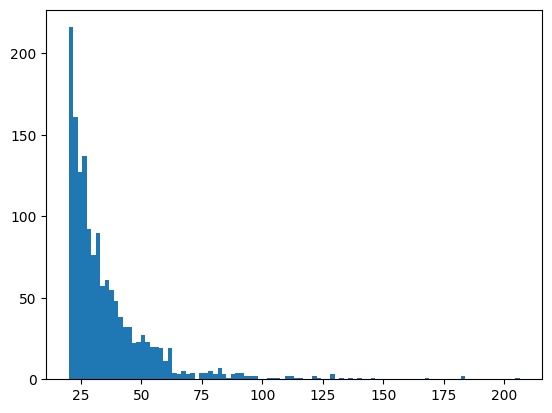

In [ ]:
plt.hist(df_r[df_r>=20], bins=100)

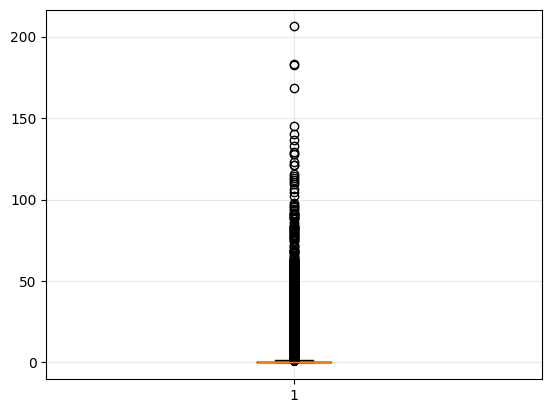

In [ ]:
plt.boxplot(df_r, vert=True, patch_artist=False)
plt.grid(True, alpha=0.3)

The few thousand rows with Rainfall >= 20 demonstrates a strong skew to the right with a long tail of increasingly large outliers. We can see evidence of the same in the boxplot. It may be possible that these outliers are throwing off our models; we intend to test this hypothesis out below. Here we used scipy's z-score statistics function to eliminate all rows where the Rainfall value is more than 3 standard deviations away from the mean.

In [ ]:
df_nooutliers = df_onehot[np.abs(stats.zscore(df_onehot["Rainfall"])) < 3] # Based on the original preparation
df_nooutliers2 = df_onehot_fulldrop[np.abs(stats.zscore(df_onehot_fulldrop["Rainfall"])) < 3] # with dropping all rows w/ missing values\
df_nooutliers3 = df_onehot_full[np.abs(stats.zscore(df_onehot_full["Rainfall"])) < 3] # With keeping everything beforehand

/usr/local/lib/python3.11/dist-packages/scipy/stats/_stats_py.py:10924: RuntimeWarning: overflow encountered in multiply
  var = _xp_mean(x_mean * x_mean_conj, keepdims=keepdims, **kwargs)
/usr/local/lib/python3.11/dist-packages/scipy/stats/_stats_py.py:10924: RuntimeWarning: overflow encountered in multiply
  var = _xp_mean(x_mean * x_mean_conj, keepdims=keepdims, **kwargs)


In [ ]:
# df_nooutliers = df_onehot[df_onehot["Rainfall"] <= 20] # Based on the original preparation
# df_nooutliers2 = df_onehot_fulldrop[df_onehot_fulldrop["Rainfall"] <= 20] # with dropping all rows w/ missing values
#from sklearn.metrics import accuracy_score
print('See the for loop definition to know which data set is being used.')
for df in [df_nooutliers, df_nooutliers2, df_nooutliers3]:
    X = df.drop(columns=["RainTomorrow", "RainToday", "Rainfall"])
    y = df["RainToday"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # logreg with built-in 5-fold cross validation. Default penalty is L2.
    # Increased max_iter because the default of 100 wasn't enough to converge.
    logregcv = LogisticRegressionCV(max_iter=256, cv=5, random_state=42)
    logregcv.fit(X_train, y_train)

    y_pred_test = logregcv.predict(X_test)
    y_pred_train = logregcv.predict(X_train)
    print('LogRegCV')
    print('Model accuracy score (against testing set): {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))
    print('Model accuracy score (against training set): {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

    logreg = LogisticRegression(random_state=42)
    logreg.fit(X_train, y_train)

    y_pred_test = logreg.predict(X_test)
    y_pred_train = logreg.predict(X_train)

    # Check accuracy against both train and test, see if there is a major difference
    print('LogReg')
    print('Model accuracy score (against testing set): {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))
    print('Model accuracy score (against training set): {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

See the for loop definition to know which data set is being used.
LogRegCV
Model accuracy score (against testing set): 0.8327
Model accuracy score (against training set): 0.8356
LogReg
Model accuracy score (against testing set): 0.8330
Model accuracy score (against training set): 0.8358
LogRegCV
Model accuracy score (against testing set): 0.8521
Model accuracy score (against training set): 0.8479
LogReg
Model accuracy score (against testing set): 0.8520
Model accuracy score (against training set): 0.8480
LogRegCV
Model accuracy score (against testing set): 0.8445
Model accuracy score (against training set): 0.8397
LogReg
Model accuracy score (against testing set): 0.8449
Model accuracy score (against training set): 0.8395


In [ ]:
len(df_nooutliers), len(df_nooutliers2), len(df_nooutliers3)

(113679, 55400, 145460)

The data set with a full drop of both outliers and all rows with missing values seem to lead to minor model performance improvements.

## Tests: Other classifier models

This section came about after Jason referenced the example project report the professor shared to determine what goes into making a high-quality report and noticed that whoever wrote that report also tested kNearestNeighbors and Random Forest models for regression and classification work.

Here we will try to see if the aforementioned models might perform better than the Logistic Regression models we attempted earlier.

For reference, here are all of the data sets we prepared:

name | description
---- | ----
df_onehot | original preparation method (drop 6 columns, drop missing value rows)
df_onehot2 | partial filling of missing values (drop 6 columns, impute missing values)
df_onehot_full | keep everything (no dropping rows or columns, impute all missing values)
df_onehot_fulldrop | drop every row with missing values
df_nooutliers | df_onehot but with outliers removed
df_nooutliers2 | df_onehot_fulldrop with outliers removed
df_nooutliers3 | df_onehot_full with outliers removed

In [ ]:
for df in [df_onehot, df_onehot2, df_onehot_full, df_onehot_fulldrop, df_nooutliers, df_nooutliers2, df_nooutliers3]:
    X = df.drop(columns=["RainTomorrow", "RainToday", "Rainfall"])
    y = df["RainToday"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    forest = RandomForestClassifier()
    forest.fit(X_train, y_train)
    score = forest.score(X_test, y_test)
    print(f"Random forest score (see table for which dataset this is) is {score}")
    print("="*20)

Random forest score (see table for which dataset this is) is 0.8509412385643913
Random forest score (see table for which dataset this is) is 0.8497868829918878
Random forest score (see table for which dataset this is) is 0.8547710710848343
Random forest score (see table for which dataset this is) is 0.8569786970741625
Random forest score (see table for which dataset this is) is 0.8508092892329345
Random forest score (see table for which dataset this is) is 0.8626353790613719
Random forest score (see table for which dataset this is) is 0.8557335349924378


In [ ]:
for df in [df_onehot, df_onehot2, df_onehot_full, df_onehot_fulldrop, df_nooutliers, df_nooutliers2]:
    X = df.drop(columns=["RainTomorrow", "RainToday", "Rainfall"])
    y = df["RainToday"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    knn = KNeighborsClassifier(weights="distance", p=2)
    knn.fit(X_train, y_train)
    score = knn.score(X_test, y_test)
    print(f"kNN score (see table for which dataset this is) is {score}")
    print("="*20)

kNN score (see table for which dataset this is) is 0.791256157635468
kNN score (see table for which dataset this is) is 0.7985356799120032
kNN score (see table for which dataset this is) is 0.7966107520967963
kNN score (see table for which dataset this is) is 0.7950145849907186
kNN score (see table for which dataset this is) is 0.791256157635468
kNN score (see table for which dataset this is) is 0.802797833935018


The Random Forest model displayed comparable performance compared to the LinReg model while the kNN model did a little bit worse.

This concludes our experiments on predicting the RainToday value.

## Training and Testing 2: LinReg model

The goal now is to predict the Rainfall value (a numerical feature) instead of RainToday. We will begin with a linear regression model snd run through the several data sets described above.

In [ ]:
for df in [df_onehot, df_onehot2, df_onehot_full, df_onehot_fulldrop, df_nooutliers, df_nooutliers2, df_nooutliers3]:
    scaler = StandardScaler()

    X = df.drop(columns=["RainTomorrow", "Rainfall"])
    y = df["Rainfall"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    score = linreg.score(X_test, y_test)
    print(f"LinReg score (see table for which dataset this is) is {score}")
    print("="*20)

LinReg score (see table for which dataset this is) is 0.2856703500866764
LinReg score (see table for which dataset this is) is 0.2794134905598623
LinReg score (see table for which dataset this is) is 0.28931695793448753
LinReg score (see table for which dataset this is) is 0.37125416665229205
LinReg score (see table for which dataset this is) is 0.2856703500866764
LinReg score (see table for which dataset this is) is 0.5402537504322164
LinReg score (see table for which dataset this is) is 0.28931695793448753


Here we see a much more noticeable effect on removing outliers: the LinReg model's accuracy went from around 0.3 +- 0.02 up to 0.52 += 0.02. This still isn't "accurate enough for useful predictions" territory, but it's significant improvement from before.

## Test: PCA

On a related tangent: Can we dimensionally reduce the data using PCA while still keeping roughly similar performances?

In [ ]:
print("See the table for which dataset is being used.")
for df in [df_onehot, df_onehot2, df_onehot_full, df_onehot_fulldrop, df_nooutliers, df_nooutliers2, df_nooutliers3]:
    for compcount in [4, 8, 16, 32, 48, 55, 62]: # 62 is same as keeping all values
        scaler = StandardScaler()
        X = df.drop(columns=["RainTomorrow", "Rainfall"])
        y = df["Rainfall"]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

        X_train = scaler.fit_transform(X_train)

        X_test = scaler.transform(X_test)
        pca = PCA(n_components=compcount)
        X_train_pca = pca.fit_transform(X_train)
        X_test_pca = pca.transform(X_test)
        #X_train_pca = scaler.fit_transform(X_train_pca)
        #X_test_pca = scaler.transform(X_test_pca)

        linreg3 = LinearRegression()
        linreg3.fit(X_train_pca, y_train)

        scores = cross_validate(linreg3, X_test_pca, y_test, cv=5,
                                scoring=("r2", "neg_mean_squared_error"),
                                return_train_score=True)
        scores
        print(f"LinReg training with PCA keeping {compcount} features: {linreg3.score(X_test_pca, y_test)}")
    print("="*20)

See the table for which dataset is being used.
LinReg training with PCA keeping 4 features: 0.08903735982261085
LinReg training with PCA keeping 8 features: 0.18307028521126378
LinReg training with PCA keeping 16 features: 0.18660787724744354
LinReg training with PCA keeping 32 features: 0.18895322458068198
LinReg training with PCA keeping 48 features: 0.27876025438928076
LinReg training with PCA keeping 55 features: 0.2817302107012917
LinReg training with PCA keeping 62 features: 0.2856703500866764
LinReg training with PCA keeping 4 features: 0.15920806967911372
LinReg training with PCA keeping 8 features: 0.16608659433040562
LinReg training with PCA keeping 16 features: 0.17513376207052755
LinReg training with PCA keeping 32 features: 0.17946747392022833
LinReg training with PCA keeping 48 features: 0.2731803170717597
LinReg training with PCA keeping 55 features: 0.27754936803833974
LinReg training with PCA keeping 62 features: 0.2794134905598623
LinReg training with PCA keeping 4 fe

Using PCA to try to dimensionally reduce our data sets did not yield any noticeable results.

## Hunch: Manual Dimensional Reduction

This is a hunch that Jason had in the middle of building the notebook. What if we were to manually identify and select the top few features that are the most strongly correlated with Rainfall and try to train models on that? The goal here is to reduce training time (by reducing data required) without seriously hurting model performances.

In [ ]:
non_numericals = ["Date", "Location", "WindGustDir", "WindDir9am", "WindDir3pm"]
df_corr = df
for categorical in non_numericals:
    #df_corr = pd.concat([df_onehot, pd.get_dummies(df_onehot[categorical], prefix=categorical)], axis=1)
    if categorical in df_corr.columns:
        df_corr = pd.concat([df_corr, pd.get_dummies(df_corr[categorical], prefix=categorical)], axis=1)
        df_corr.drop(columns=categorical, inplace=True)
        #df_corr.drop(columns=categorical, inplace=True)
#df_onehot.head(10)

In [ ]:
corr = df_corr.corr()["Rainfall"]
pd.set_option('display.max_rows', 120) # so that everything prints without ... in the middle
print(corr)

MinTemp                      0.102340
MaxTemp                     -0.073560
Rainfall                     1.000000
Evaporation                 -0.041366
Sunshine                    -0.168784
WindGustSpeed                0.125110
WindSpeed9am                 0.084587
WindSpeed3pm                 0.055689
Humidity9am                  0.220661
Humidity3pm                  0.247945
Pressure9am                 -0.158841
Pressure3pm                 -0.119387
Cloud9am                     0.164202
Cloud3pm                     0.139380
Temp9am                      0.010932
Temp3pm                     -0.077464
RainToday                    0.502806
RainTomorrow                 0.233877
Year                        -0.010012
Month                       -0.030713
Day                          0.001842
WindDir9am_E                -0.027855
WindDir9am_ENE              -0.025170
WindDir9am_ESE              -0.014290
WindDir9am_N                -0.039647
WindDir9am_NE               -0.021295
WindDir9am_N

There's a lot of features here, including the one-hot encoded ones. We arbitrarily chose to select features with an absolute correlation of more than 0.06.

In [ ]:
for mydf in [df_onehot, df_onehot2, df_onehot_full, df_onehot_fulldrop, df_nooutliers, df_nooutliers2, df_nooutliers3]:
    cols_list = corr[(corr>0.06) | (corr<-0.06)].index.to_list() + ["RainToday", "RainTomorrow", "Rainfall"]
    common_cols = list(set(cols_list).intersection(set(mydf.columns))) # to prevent trying to select columns that some datsets don't have
    df_snip = mydf[common_cols]
    scaler = StandardScaler()
    X = df_snip.drop(columns=["RainTomorrow", "Rainfall"])
    y = df_snip["Rainfall"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

    X_train = scaler.fit_transform(X_train)

    X_test = scaler.transform(X_test)
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    scores = cross_validate(linreg, X_test, y_test, cv=5,
                        scoring=("r2", "neg_mean_squared_error"),
                        return_train_score=True)
    #print(scores)
    print(linreg.score(X_test, y_test))
    #print("="*20)

/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:559: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_base.py:681: RuntimeWarning: overflow encountered in cast
  cond = max(X.shape) * np.finfo(X.dtype).eps
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_regression.py:940: RuntimeWarning: invalid value encountered in divide
  numerator[valid_score] / denominator[valid_score]
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_regression.py:940: RuntimeWarning: invalid value encountered i

nan


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_base.py:681: RuntimeWarning: overflow encountered in cast
  cond = max(X.shape) * np.finfo(X.dtype).eps
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_regression.py:940: RuntimeWarning: invalid value encountered in divide
  numerator[valid_score] / denominator[valid_score]
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_regression.py:1275: RuntimeWarning: overflow encountered in square
  numerator = xp.sum(weight * (y_true - y_pred) ** 2, axis=0)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_regression.py:1277: RuntimeWarning: overflow encountered 

nan


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_base.py:681: RuntimeWarning: overflow encountered in cast
  cond = max(X.shape) * np.finfo(X.dtype).eps
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_regression.py:940: RuntimeWarning: invalid value encountered in divide
  numerator[valid_score] / denominator[valid_score]
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_regression.py:1275: RuntimeWarning: overflow encountered in square
  numerator = xp.sum(weight * (y_true - y_pred) ** 2, axis=0)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_regression.py:1277: RuntimeWarning: overflow encountered 

nan


/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_regression.py:940: RuntimeWarning: invalid value encountered in divide
  numerator[valid_score] / denominator[valid_score]
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_regression.py:940: RuntimeWarning: invalid value encoun

nan


/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:559: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_base.py:681: RuntimeWarning: overflow encountered in cast
  cond = max(X.shape) * np.finfo(X.dtype).eps
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_regression.py:940: RuntimeWarning: invalid value encountered in divide
  numerator[valid_score] / denominator[valid_score]
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_regression.py:940: RuntimeWarning: invalid value encountered i

nan


/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: overflow encountered in redu

1.0


/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:559: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_base.py:681: RuntimeWarning: overflow encountered in cast
  cond = max(X.shape) * np.finfo(X.dtype).eps
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_regression.py:940: RuntimeWarning: invalid value encountered in divide
  numerator[valid_score] / denominator[valid_score]
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_regression.py:1275: RuntimeWarning: overflow encountered in square
  numerator = xp.sum(weight * (y_true - y_pred) ** 2, axis=0)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: overflow encountered in

nan


/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_regression.py:940: RuntimeWarning: invalid value encountered in divide
  numerator[valid_score] / denominator[valid_score]
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_regression.py:1275: RuntimeWarning: overflow encountered in square
  numerator = xp.sum(weight * (y_true - y_pred) ** 2, axis=0)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_regression.py:1277: RuntimeWarning: overflow encountered in square
  weight * (y_true - _average(y_true, axis=0, weights=sample_weight, xp=xp)) ** 2,
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_regression.py:94

The warnings are a result of a small mix-up near the beginning of this notebook, as a result of the way the pandas replace() function handles column datatypes. They do not affect model performance but should be kept in mind.

By manually selecting 17 out of 120 columns (after using one-hot encoding to turn categoricals into numericals) based on correlation with RainToday, we achieved results almost as good as those on the full data set while keeping only 16 features in X.

## Test: Random Forest and kNN

As with the classification work, here we will see if Random Forest and kNN models can outdo Linear Regression.

In [ ]:
for df in [df_onehot, df_onehot2, df_onehot_full, df_onehot_fulldrop, df_nooutliers, df_nooutliers2, df_nooutliers3]:
    scaler = StandardScaler()

    X = df.drop(columns=["RainTomorrow", "Rainfall"])
    y = df["Rainfall"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    knn = KNeighborsRegressor(weights="distance", p=2)
    knn.fit(X_train, y_train)
    score = knn.score(X_test, y_test)
    print(f"KNN score (see table for which dataset this is) is {score}")
    print("="*20)

KNN score (see table for which dataset this is) is 0.18140954160563594
KNN score (see table for which dataset this is) is 0.1751052819276595
KNN score (see table for which dataset this is) is 0.1311447258390348
KNN score (see table for which dataset this is) is 0.16775161851618514
KNN score (see table for which dataset this is) is 0.18140954160563594
KNN score (see table for which dataset this is) is 0.24189000929847193
KNN score (see table for which dataset this is) is 0.1311447258390348


In [ ]:
for df in [df_onehot, df_onehot2, df_onehot_full, df_onehot_fulldrop, df_nooutliers, df_nooutliers2, df_nooutliers3]:
    scaler = StandardScaler()

    X = df.drop(columns=["RainTomorrow", "Rainfall"])
    y = df["Rainfall"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    forest = RandomForestRegressor(n_estimators=25) # using the default 100 trees is way too slow
    forest.fit(X_train, y_train)
    score = forest.score(X_test, y_test)
    print(f"Random Forest score (see table for which dataset this is) is {score}")
    print("="*20)

Random Forest score (see table for which dataset this is) is 0.40309620943635627
Random Forest score (see table for which dataset this is) is 0.35484164148615327
Random Forest score (see table for which dataset this is) is 0.4016202358653522
Random Forest score (see table for which dataset this is) is 0.4460477850768405
Random Forest score (see table for which dataset this is) is 0.4075039476573825
Random Forest score (see table for which dataset this is) is 0.5751908809912765
Random Forest score (see table for which dataset this is) is 0.39355030004013825


The random forests took longer than expected to train (around 2-3 minutes to train one forest). Even if it performed better, users should be wary of training times.

The kNN model did worse, as expected, while the Random Forest model seems to be slightly better than the Linear Regression model. However, the improvements are not significant and might not warrant the extra training time.

## Test: Escalate to ANN

It is possible that the LinearRegression model is not powerful enough to learn the mapping between X and y. I will now escalate to a fully-connected artificial neural network to try and predict Rainfall levels or RainToday values.

In [ ]:
#from sklearn.neural_network import MLPRegressor

scaler = StandardScaler()
# Arbitrarily decided to use df_nooutliers2.
X = df_nooutliers2.drop(columns=["RainTomorrow", "Rainfall"])
y = df_nooutliers2["Rainfall"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

mlp = MLPRegressor(hidden_layer_sizes = [64,32,16,8],
                   activation="relu", solver="adam",
                   verbose=True, learning_rate="adaptive",
                   learning_rate_init = 0.002, random_state=2501,
                   batch_size=160, max_iter=512, early_stopping=True) # arbitrarily chosen hyperparams

mlp.fit(X_train,y_train)

Iteration 1, loss = 3.15867945
Validation score: 0.550844
Iteration 2, loss = 2.52820141
Validation score: 0.547285
Iteration 3, loss = 2.44147352
Validation score: 0.541756
Iteration 4, loss = 2.39230905
Validation score: 0.551793
Iteration 5, loss = 2.29751000
Validation score: 0.547169
Iteration 6, loss = 2.22729980
Validation score: 0.542978
Iteration 7, loss = 2.15257804
Validation score: 0.523568
Iteration 8, loss = 2.06251028
Validation score: 0.514788
Iteration 9, loss = 1.96213092
Validation score: 0.512747
Iteration 10, loss = 1.85697822
Validation score: 0.491078
Iteration 11, loss = 1.78014713
Validation score: 0.469453
Iteration 12, loss = 1.68517528
Validation score: 0.485264
Iteration 13, loss = 1.58506487
Validation score: 0.458101
Iteration 14, loss = 1.53592165
Validation score: 0.468080
Iteration 15, loss = 1.44693965
Validation score: 0.416676
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


MLPRegressor(batch_size=160, early_stopping=True,
             hidden_layer_sizes=[64, 32, 16, 8], learning_rate='adaptive',
             learning_rate_init=0.002, max_iter=512, random_state=2501,
             verbose=True)

Admittedly we should have done this part using a GridSearchCV. However, this realization came after this chart was already assembled.

Changelog of various model hyperparameters attempted and model performance:    
weights | loss/valid scores | epochs | changes
--- | --- | --- | ---
[32, 64, 32] | 2.55 | n/a | did not record iteration count    
[64, 64] | 1.795 | 512 | (reached limit, did not converge)    
[64, 128, 64]| 1.676 | 512 | (reached limit, did not converge)    
[64, 128, 64]| 1.676 | 512 | (switched learning rate from constant to adaptive; inverse scaling didn't get past 20 epochs)    
[64, 128, 64]| 0.835 | 512 | (switched solver from SGD to Adam)    
[64, 64] | 1.538 | 512 | (Adam, adaptive)    
[64, 64] | 1.873 | 370 | (Adam, adaptive, changed activation to ReLU)    
[64, 32, 16, 8] | 1.810 | 295 | (Adam, adaptive, ReLU)    
[32, 32, 16, 8] | 2.386 | 314 | (placeholder
[32, 32, 16, 8] | 2.06 | 69 | (default hyperparams, using df_snip to speed up training)    
[32, 32, 16, 8] | 2.003/0.56 | 41 | (logistic -> ReLU, turned on early stopping)    
[32, 32, 16, 8] | 1.927/0.584 | 85 | (ReLU, adaptive)    
[32, 32, 16, 8] | 1.932/0.569 | 41 | (ReLU, Adam)     
[64, 32, 16, 8] | 1.899/0.569 | 77 | (ReLU, adaptive)    
[32, 32, 16, 8] | 1.826/0.559 | 28 | (using df_nooutliers2)    
[32, 32, 16, 8] | 1.595/0.543 | 28 | (Adam, using df_nooutliers2)    
[32, 32, 16, 8] | 1.460/0.526 | 16 | (ReLU, Adam, using df_nooutliers2)    
[32, 32, 16, 8] | 1.217/0.468 | 16 | (ReLU, adaptive, using df_nooutliers2)    
[64, 32, 16, 8] | 1.2749/0.519 | 77 | (ReLU, Adam, df_nooutliers2)    
[64, 32, 16, 8] | 1.215/0.515 | 15 | (ReLU, Adam, df_nooutliers2, batch 128)    

In [ ]:
"""
We ran this cell repeatedly for different iterations of the multi-layer perceptron.
Previous runs are not reflected in the out section.

Scores against the testing sets (1.0 is best)
[64, 128, 64], Adam + adaptive learning: -0.2779
[64, 64], Adam + adaptive learning: -0.2354
[64, 64], Adam + adaptive + ReLU: -0.0389
[64, 32, 16, 8], Adam + adaptive + ReLU: -0.0400
[32, 32, 16, 8], Adam + adaptive + ReLU: 0.0856
[32, 32, 16, 8], default, using df_trim: 0.593
[32, 32, 16, 8], ReLU + early stop: 0.595
[32, 32, 16, 8], ReLU + early stop + adaptive: 0.598
[32, 32, 16, 8], ReLU + early stop + Adam: 0.595
[64, 32, 16, 8]: ReLU + early stop: 0.598
[32, 32, 16, 8]: df_nooutliers2: 0.604
[32, 32, 16, 8]: ReLU + Adam + df_nooutliers2: 0.596
[32, 32, 16, 8]: ReLU + adaptive + df_nooutliers2: 0.600
[64, 32, 16, 8]: ReLU + Adam + df_nooutliers2: 0.590
[64, 32, 16, 8]: ReLU + Adam + df_nooutliers2 + batch 128: 0.597
"""

mlp.score(X_test, y_test)

This is something we considered near the end of the development and reporting process: What results might we find from trying to apply GridSearchCV to find the best hyperparameters for a given X and y?

The printed text below the following cell was due to a stray MLPRegressor training line left during running. We have since then removed that line. Due to the extended time required to run the cell, we will not re-run the cell and instead leave the output as-is.

In [ ]:
from sklearn.model_selection import GridSearchCV

scaler = StandardScaler()
# Arbitrarily decided to use df_nooutliers2.
X = df_nooutliers2.drop(columns=["RainTomorrow", "Rainfall", "RainToday"])
y = df_nooutliers2["RainToday"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

# Tests different hyperparameters for RandomForestRegressor to see which is best
param_grid = {
    "hidden_layer_sizes" : [[64,32,16,8,1], [32,16,8,1]],
    "activation" : ["relu", "logistic"],
    "solver" : ["adam", "sgd"],
    "learning_rate_init" : [0.001, 0.002],
    "random_state" : [2501],
    "batch_size": [16, 32, 64, 128, 160],
    "max_iter": [512],
    "early_stopping": [True],
    "learning_rate": ["adaptive", "constant"]
}

gs = GridSearchCV(estimator=MLPRegressor(),
              param_grid=param_grid,
              scoring="r2",
              refit=True,
              cv=5,
              n_jobs=-1)

gs.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import mean_squared_error

print("Results for Grid Search w/ MLP:")
predictions = gs.predict(X_test)
print(f"Best params found: {gs.best_params_}")
print(f"R-Squared: {gs.best_score_}, MSE: {mean_squared_error(y_test, predictions)}")
print("\n")

Results for Grid Search w/ MLP:


NotFittedError: This GridSearchCV instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

## Conclusions, findings

As a result of our work, we have arrived at a number of conclusions:

#### Data Preprocessing
- Even though data preprocessing and preparation wasn't a major part of the course curriculum, it still matters greatly for data science and machine learning work. After, garbage in, garbage out.
- The models we tested - linear regression, kNN, random forest - were resistant to performance losses due to various approaches on dropping or imputing missing vaues. The different data sets made from each preparation method produced similar metrics.
- The presence or absence of outliers (more specifically, in the Rainfall feature) did not greatly affect the classification models but did affect the regression models. This is mainly because the regression work was done against the Rainfall feature, where it had a great effect, while the classification work did not include that feature at all in X.

#### Model prediction: RainToday
- Our several tested models performed similarly to or worse than the model shown in the first Existing Work mentioned in our report. This occurred despite our various data preprocessing approaches and testings with a few different hyperparameter options. This may be the result of a natural level of noise in the data set, or of other variables not included in the data set contributing to whether it rained in a given place in Australia on a given day.
- Test

#### Model prediction: Rainfall
- Our models did not perform particularly well when trying to regress for the Rainfall feature. The linear regression model performed better after being trained on a data set without outliers, but its metrics still did not reach satisfactory levels.
- The Multi-Layer Perceptron model failed to surpass